In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
# Import the dataset
df = pd.read_csv("Dataset.csv")


#####################################
# Data Preprocessing
#####################################

In [ ]:
# Check for missing values
null_counts = df.isnull().sum()
print(null_counts)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Dealing with the missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


from above we can see that there are object Dtype which means they are categorical and the rest are numerical.

Addressing the missing values in categorical columns - Gender, Married, Dependents, Self_Employed, and Credit_History - by substituting them with the mode. For other columns, we'll use the mean to replace missing data.

In [ ]:
#since there are null values which is represented as NAN replace them using mode and mean column by column
df['Credit_History'].fillna(df['Credit_History'].mode(), inplace=True)  # inplace=true means that change will affect dataset

df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)  #fillna is a function to fill NAN values


df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)  #mode() is a  function to find out mode of that column


df['Married'].fillna(df['Married'].mode()[0], inplace=True)


df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)


df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)


df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In the preceding lines, we've addressed null values, denoted as 'NAN' in the dataset, by substituting them with the mode (the most frequently occurring data point) of the respective column.

In [ ]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)



However, for the 'LoanAmount' column, using the mode isn't appropriate, so we'll instead employ the mean to replace any null values.

In [ ]:
df.isnull().sum() #checking again to see if there are any null values left

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df.columns #to check all the columns name

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df= df.drop('Loan_ID', axis=1)#dropping Loan_Id since id has nothing to do with loanstatus


In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


Visualizing the data

In [ ]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  146.412162        342.410423   
std        6109.041673        2926.248369   84.037468         64.428629   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  129.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.855049  
std          0.352339  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


<ipython-input-50-46844acdaec0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


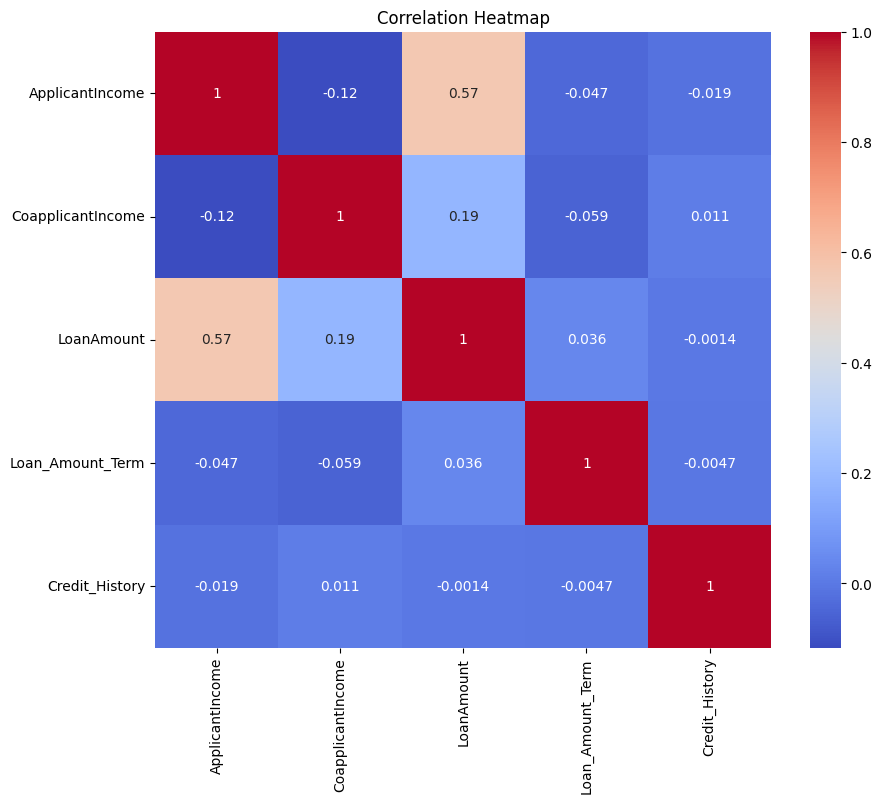

In [ ]:
# Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

<Axes: title={'center': 'Loan Status Count bar plot'}>

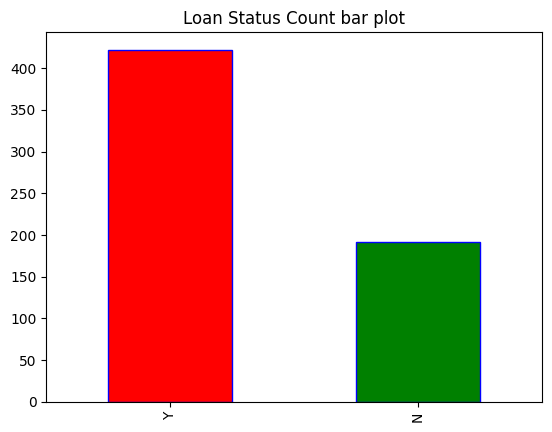

In [ ]:
plt.title("Loan Status Count bar plot")
df['Loan_Status'].value_counts().plot.bar(color=['red','green'],edgecolor= 'blue')

it is plotting the number of Loan Staus Y= yes and N= No

<Axes: title={'center': 'Credit History'}>

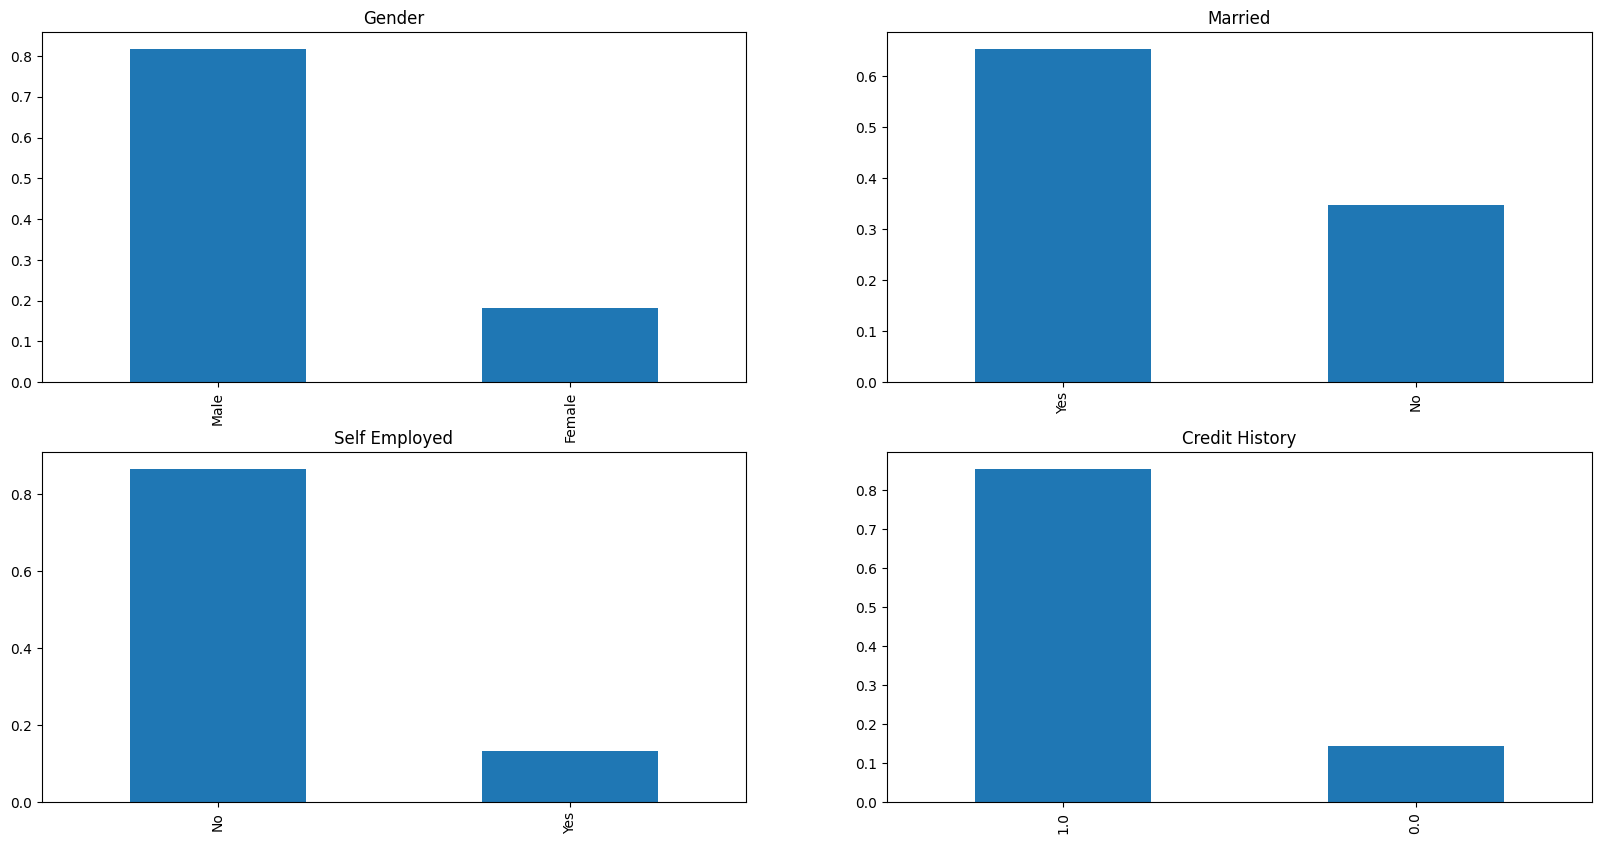

In [ ]:
#now plot of categorical features
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
df['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.subplot(2,2,2)
df['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(2,2,3)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')
plt.subplot(2,2,4)
df['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')

it is the plot of total number of coulmns , here normalize = True means that it is showing the data in percentage

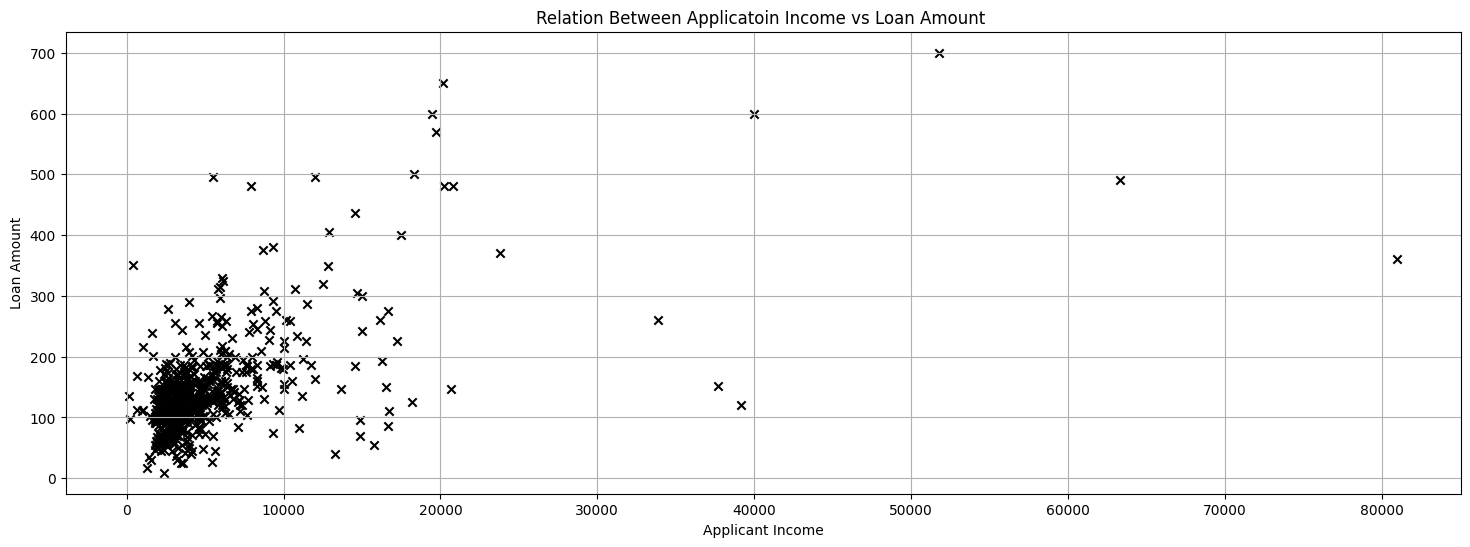

In [ ]:
#relationship versus Applicant Income vs Loan Amount
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(df['ApplicantIncome'] , df['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

This is a plot depicting the relationship between Applicant Income and Loan Amount. Interestingly, it reveals that individuals with lower income levels have taken the largest loans.

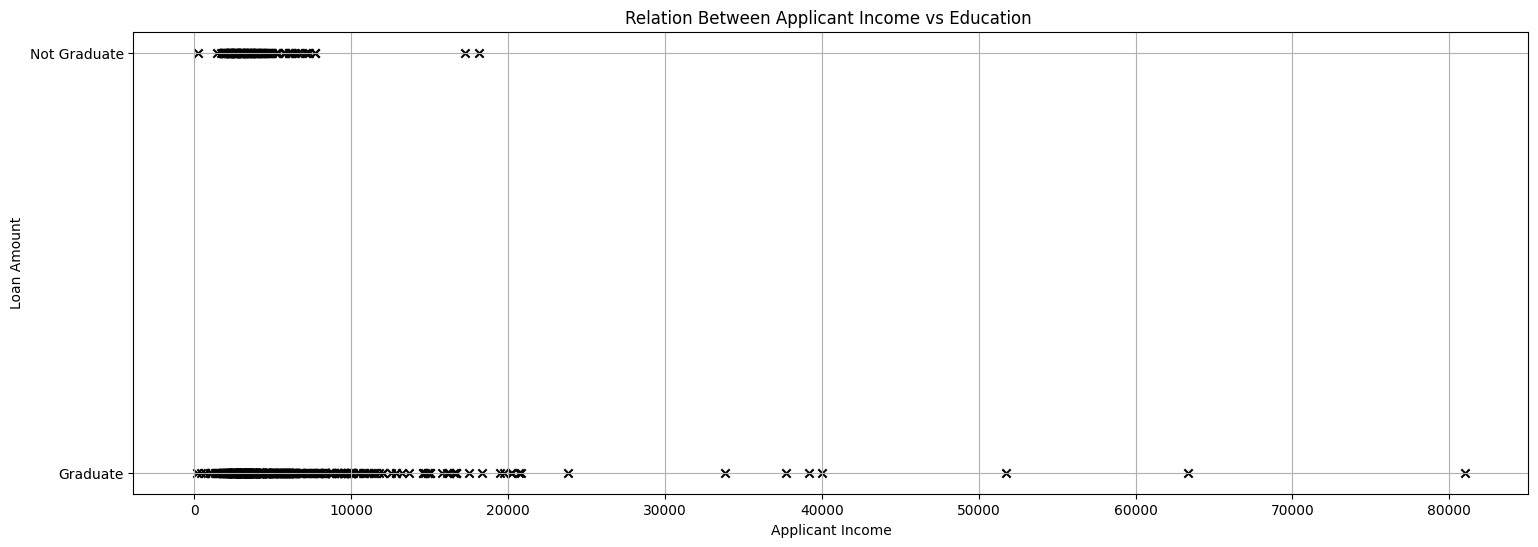

In [ ]:
#relationship versus Applicant Income vs Education
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicant Income vs Education ")

plt.grid()
plt.scatter(df['ApplicantIncome'] , df['Education'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

This graph presents the relationship between Applicant Income and Education level, highlighting that graduates typically have a higher income compared to non-graduates.

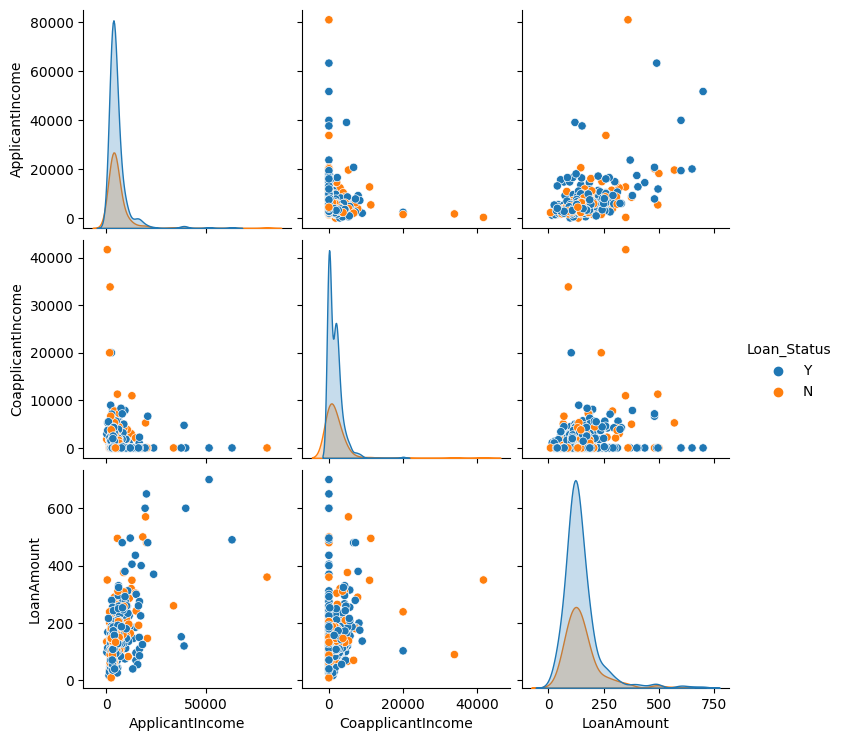

In [ ]:
# Pairwise scatter plot of numerical features
sns.pairplot(df, vars=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], hue='Loan_Status')
plt.show()

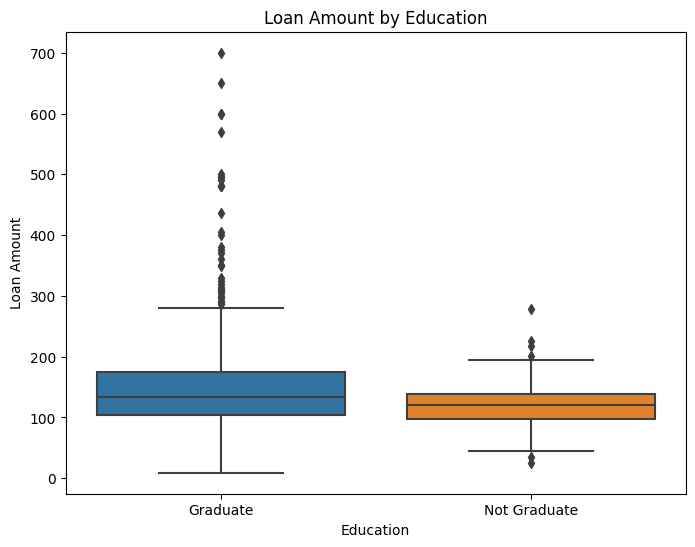

In [ ]:
# Box plot for Loan Amount by Education
plt.figure(figsize=(8, 6))
sns.boxplot(x='Education', y='LoanAmount', data=df)
plt.title('Loan Amount by Education')
plt.xlabel('Education')
plt.ylabel('Loan Amount')
plt.show()

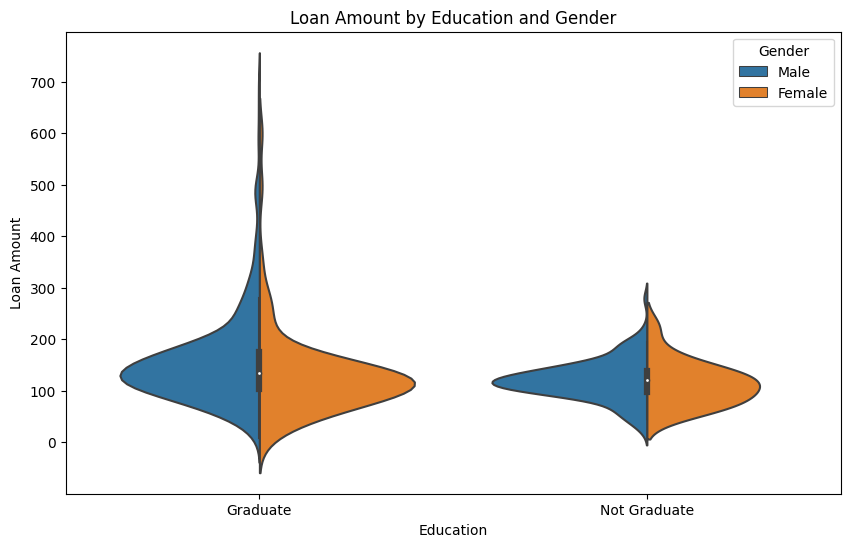

In [ ]:
#violin plot for loan amount by Education and Gender
plt.figure(figsize=(10,6))
sns.violinplot(x='Education',y='LoanAmount',hue='Gender',data=df,split=True)
plt.title('Loan Amount by Education and Gender')
plt.xlabel('Education')
plt.ylabel('Loan Amount')
plt.show()

Here we can see that number of graduates are taking more than non-graduates.

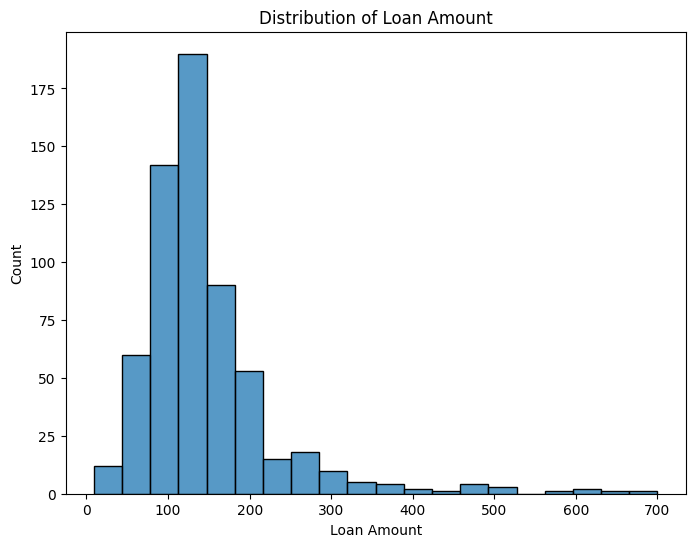

In [ ]:
#histogram of loan amount
plt.figure(figsize=(8,6))
sns.histplot(df['LoanAmount'],bins=20)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

Mostly people are only taking loans in the range of (50-200)

The next step involves encoding, which converts categorical data into numeric form for easier processing. For instance, in the 'Gender' column, the two categories 'Male' and 'Female' would be represented numerically as '1' and '0' respectively.

In [ ]:
#unique values
{column: list(df[column].unique()) for column in df.select_dtypes('object').columns}

{'Gender': ['Male', 'Female'],
 'Married': ['No', 'Yes'],
 'Dependents': ['0', '1', '2', '3+'],
 'Education': ['Graduate', 'Not Graduate'],
 'Self_Employed': ['No', 'Yes'],
 'Property_Area': ['Urban', 'Rural', 'Semiurban'],
 'Loan_Status': ['Y', 'N']}

Encoding columns with the LabelEncoder





In [ ]:
from sklearn.preprocessing import LabelEncoder
feature_cols=  ['Education', 'Dependents',
                'Gender','Married','Self_Employed','Loan_Status']
le= LabelEncoder()
for cols in feature_cols:
    df[cols]= le.fit_transform(df[cols])


Applying a for loop to pass each column individually to the LabelEncoder. This allows the LabelEncoder to autonomously assign distinct numeric labels to the unique categories within each respective column.

In [ ]:
#but since Property_area has 3 different columns it is better to one hot encode it
df= pd.get_dummies(df,columns=['Property_Area'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    int64  
 1   Married                  614 non-null    int64  
 2   Dependents               614 non-null    int64  
 3   Education                614 non-null    int64  
 4   Self_Employed            614 non-null    int64  
 5   ApplicantIncome          614 non-null    int64  
 6   CoapplicantIncome        614 non-null    float64
 7   LoanAmount               614 non-null    float64
 8   Loan_Amount_Term         614 non-null    float64
 9   Credit_History           614 non-null    float64
 10  Loan_Status              614 non-null    int64  
 11  Property_Area_Rural      614 non-null    uint8  
 12  Property_Area_Semiurban  614 non-null    uint8  
 13  Property_Area_Urban      614 non-null    uint8  
dtypes: float64(4), int64(7), u

df['CoapplicantIncome']=df['CoapplicantIncome'].astype(np.int32)
df['LoanAmount'] = df['LoanAmount'].astype(np.int32)
df['Credit_History']=df['Credit_History'].astype(np.int32)
df['ApplicantIncome']=df['ApplicantIncome'].astype(np.int32)
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype(np.int32)


Now, we're moving on to scale our numerical columns. We're doing this because KNN, as an algorithm, operates based on distance. If data points exhibit large disparities in their values, it could lead to misclassification. Therefore, we will employ StandardScaler to standardize these numerical columns and ensure all features contribute proportionately to our final result

In [ ]:
class StandardScaler(object):
    def __init__(self):
        pass

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.scale_ = np.std(X - self.mean_, axis=0)
        return self

    def transform(self, X):
        return (X - self.mean_) / self.scale_

    def fit_transform(self, X):
        return self.fit(X).transform(X)

In the first function, we calculate the mean for each column, and in the second function, we determine the standard deviation. These are crucial steps for data normalization, which helps to make our data more suitable for analysis by bringing all values within a similar range.

In [ ]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [ ]:

rows= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
SS= StandardScaler()
for row in rows:
    df[rows]= SS.fit_transform(df[rows])

In [ ]:
df # now that the data is scaled

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0.072991,-0.554487,-1.157236e-17,360.0,1.0,1,0,0,1
1,1,1,1,0,0,-0.134412,-0.038732,-2.192733e-01,360.0,1.0,0,1,0,0
2,1,1,0,0,1,-0.393747,-0.554487,-9.576410e-01,360.0,1.0,1,0,0,1
3,1,1,0,1,0,-0.462062,0.251980,-3.145466e-01,360.0,1.0,1,0,0,1
4,1,0,0,0,0,0.097728,-0.554487,-6.445428e-02,360.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.410130,-0.554487,-8.980952e-01,360.0,1.0,1,1,0,0
610,1,1,3,0,0,-0.212557,-0.554487,-1.267279e+00,180.0,1.0,1,1,0,0
611,1,1,1,0,0,0.437174,-0.472404,1.269371e+00,360.0,1.0,1,0,0,1
612,1,1,2,0,0,0.357064,-0.554487,4.833669e-01,360.0,1.0,1,0,0,1


Ensuring that X has features and Y has target variables we are trying to predict

In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0.072991,-0.554487,-1.157236e-17,360.0,1.0,1,0,0,1
1,1,1,1,0,0,-0.134412,-0.038732,-2.192733e-01,360.0,1.0,0,1,0,0
2,1,1,0,0,1,-0.393747,-0.554487,-9.576410e-01,360.0,1.0,1,0,0,1
3,1,1,0,1,0,-0.462062,0.251980,-3.145466e-01,360.0,1.0,1,0,0,1
4,1,0,0,0,0,0.097728,-0.554487,-6.445428e-02,360.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.410130,-0.554487,-8.980952e-01,360.0,1.0,1,1,0,0
610,1,1,3,0,0,-0.212557,-0.554487,-1.267279e+00,180.0,1.0,1,1,0,0
611,1,1,1,0,0,0.437174,-0.472404,1.269371e+00,360.0,1.0,1,0,0,1
612,1,1,2,0,0,0.357064,-0.554487,4.833669e-01,360.0,1.0,1,0,0,1


In [ ]:
df= df.reset_index(drop=True)

In [ ]:
X=df.drop('Loan_Status', axis=1) #putting all column except Loan_Status column on X
y= df.Loan_Status  #putting only Loan_Status column on Y since it's target variable

In [ ]:
X= X.to_numpy()

In [ ]:
y= y.to_numpy()

In [ ]:
#now preprocessing part is done , now let's divide dataset into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25)


test_size=0.25 indicates that 25% of the dataset will be set aside for testing our model, providing us with a way to validate our model's performance on unseen data.

now let's implement our own custom KNN function from scratch

In [ ]:
##########till here check

In [ ]:
X_train

array([[1., 1., 2., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 1., 2., ..., 1., 0., 0.]])

In [ ]:
X_test

array([[0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
y_train

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
def EuclideanDistance(v1, v2):
    sum = 0.0
    for index in range(len(v1)):
        ## Your CODE
        sum += (v1[index]-v2[index])**2
    return sum ** 0.5

In [ ]:
from scipy.stats import mode
class OurKNearestNeighbors:
    """
    Our implementation of the k-nearest neighbors (KNN) algorithm.
    """

    def __init__(self, k, metric='euclidean'):
        """
        Initialize an instance of the class.

        Parameters:
        - k (int): Number of nearest neighbors to consider.
        - metric (str): Distance metric to use (default: 'euclidean').
        """
        self.k = k
        self.metric = metric

    def fit(self, train_data, train_labels):
        """
        Store the training data and labels.

        Parameters:
        - train_data (numpy.ndarray): Training data.
        - train_labels (numpy.ndarray): Labels for the training data.
        """
        self.train_data = train_data
        self.train_labels = train_labels

    def predict(self, test_data):
        """
        Make predictions for each test example and return results.

        Parameters:
        - test_data (numpy.ndarray): Test data.

        Returns:
        - results (list): Predicted labels for the test data.
        """
        results = []
        for item in test_data:
            distances = self._calculate_distances(item)
            indices = np.argsort(distances)[:self.k]
            labels = self.train_labels[indices]
            result = mode(labels).mode[0]
            results.append(result)
        return results

    def _calculate_distances(self, item):
        """
        Calculate distances between the test item and training data.

        Parameters:
        - item (numpy.ndarray): Test item.

        Returns:
        - distances (numpy.ndarray): Distances between the test item and training data.
        """
        if self.metric == 'euclidean':
            distances = np.linalg.norm(self.train_data - item, axis=1)
        # Add more distance metrics here if needed
        return distances


"""in the function above we are calculating distance of each point of test data with all points of training data and we are
finding it' labels bases on shortest distance between k points hence the name K -nearest neighbors
we are using mode function to take out the most common label and return it so that our predict function can return the list of
labels for  out test set"""

"in the function above we are calculating distance of each point of test data with all points of training data and we are \nfinding it' labels bases on shortest distance between k points hence the name K -nearest neighbors\nwe are using mode function to take out the most common label and return it so that our predict function can return the list of\nlabels for  out test set"

#now what's importank is to pick K-> number of points to consider inorder to
classify the test point

<ipython-input-85-454f62f50b06>:44: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  result = mode(labels).mode[0]


total: 154  correct: 107  accuracy: 0.69 K=1
total: 154  correct: 103  accuracy: 0.67 K=2
total: 154  correct: 113  accuracy: 0.73 K=3
total: 154  correct: 112  accuracy: 0.73 K=4
total: 154  correct: 120  accuracy: 0.78 K=5
total: 154  correct: 118  accuracy: 0.77 K=6
total: 154  correct: 115  accuracy: 0.75 K=7
total: 154  correct: 117  accuracy: 0.76 K=8
total: 154  correct: 117  accuracy: 0.76 K=9
total: 154  correct: 118  accuracy: 0.77 K=10
total: 154  correct: 117  accuracy: 0.76 K=11
total: 154  correct: 118  accuracy: 0.77 K=12
total: 154  correct: 113  accuracy: 0.73 K=13
total: 154  correct: 114  accuracy: 0.74 K=14
total: 154  correct: 112  accuracy: 0.73 K=15
total: 154  correct: 115  accuracy: 0.75 K=16
total: 154  correct: 113  accuracy: 0.73 K=17
total: 154  correct: 113  accuracy: 0.73 K=18
total: 154  correct: 110  accuracy: 0.71 K=19
total: 154  correct: 111  accuracy: 0.72 K=20
total: 154  correct: 110  accuracy: 0.71 K=21
total: 154  correct: 111  accuracy: 0.72 K=

Text(0, 0.5, 'Testing Accuracy')

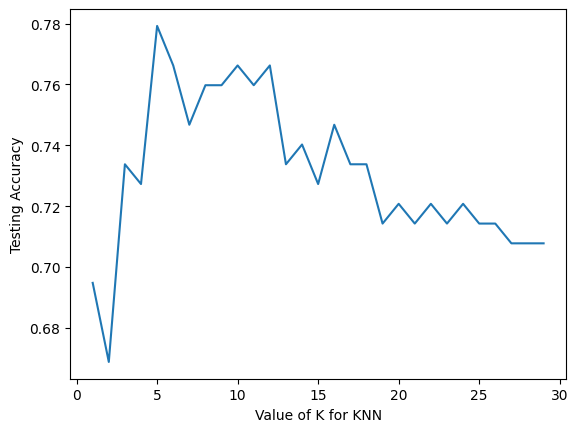

In [ ]:
#
result = []
for k in range(1,30):

    clf = OurKNearestNeighbors(k)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    correct, total = 0, 0
    for pred, label in zip(preds, y_test):
        if pred == label: correct += 1
        total += 1
    print ('total: %3d  correct: %3d  accuracy: %3.2f K=%d' %(total, correct, 1.0*correct/total,k))
    result.append(1.0*correct/total)
##plot the result
plt.plot(range(1,30),result)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

in the above function are just repeating the above function to find best value of k because the accuracy or performance of the algorithm depends on value of k
so we are just trying to predict the best value of k


In [ ]:
#it looks like the best value for K= 7 so we will use that to predict
model= OurKNearestNeighbors(7)
model.fit(X_train,y_train)

In [ ]:
pred= model.predict(X_test)

<ipython-input-85-454f62f50b06>:44: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  result = mode(labels).mode[0]


In [ ]:
#now let's print accuracy score again
def accuracy_score(y_true, y_pred, normalize=True):
    correct = sum(y_true == y_pred)
    return correct / len(y_true) if normalize else correct

In [ ]:
accuracy_score(y_test,pred)

0.7467532467532467

In [ ]:
#now let's print confusion matrix it helps to see how our classifider did
def confusion_matrix(y_true, y_pred, labels=None):
    labels = labels if labels else sorted(set(y_true) | set(y_pred))
    indexes = {v:i for i, v in enumerate(labels)}
    matrix = np.zeros((len(indexes),len(indexes))).astype(int)
    for t, p in zip(y_true, y_pred):
        matrix[indexes[t], indexes[p]] += 1
    return matrix

In [ ]:
confusion_matrix(y_test,pred)

array([[ 12,  34],
       [  5, 103]])

so 12 = true positive = which is true and is also predicted true
34 is true negative = which is true but positive false
5 is false positve= which is false but predicted as positive
and 103 is false positive = which is false and predicted as false
In our case model did 34 predictions but that is good since we had so little data

let's create Big-O plots for the KNN algorithm
for that let's create random 1000values to see it
so we are creating random integers using randint function
and passing it through KNN to calcuate the time it needs to process it
and shape is important bcs training data shape and test data shape neeeds to be same


In [ ]:
import time
import numpy as np

elements = np.zeros(19)
elements2 = np.zeros(19)
times = np.zeros(19)
times2 = np.zeros(19)

rng = np.random.default_rng()

for i in range(1, 20):
    train = rng.integers(0, 100 * i, size=(100 * i, 2))
    label = rng.integers(0, 100 * i, 100 * i)
    test = rng.integers(0, 50 * i, size=(50 * i, 2))
    cc = OurKNearestNeighbors(14)

    start = time.time()
    cc.fit(train, label)
    end = time.time()

    start2 = time.time()
    cc.predict(test)
    end2 = time.time()

    print(len(train), "elements took time to fit:", end - start, len(test), "elements took to predict", end2 - start2)

    elements[i-1] = len(train)
    elements2[i-1] = len(test)
    times[i-1] = end - start
    times2[i-1] = end2 - start2


<ipython-input-85-454f62f50b06>:44: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  result = mode(labels).mode[0]


100 elements took time to fit: 2.86102294921875e-06 50 elements took to predict 0.015397787094116211
200 elements took time to fit: 2.6226043701171875e-06 100 elements took to predict 0.016719341278076172
300 elements took time to fit: 2.1457672119140625e-06 150 elements took to predict 0.02495718002319336
400 elements took time to fit: 1.9073486328125e-06 200 elements took to predict 0.034552574157714844
500 elements took time to fit: 2.384185791015625e-06 250 elements took to predict 0.048918724060058594
600 elements took time to fit: 1.6689300537109375e-06 300 elements took to predict 0.07677173614501953
700 elements took time to fit: 2.1457672119140625e-06 350 elements took to predict 0.0884091854095459
800 elements took time to fit: 1.9073486328125e-06 400 elements took to predict 0.09272289276123047
900 elements took time to fit: 1.5974044799804688e-05 450 elements took to predict 0.13278937339782715
1000 elements took time to fit: 2.384185791015625e-06 500 elements took to predi

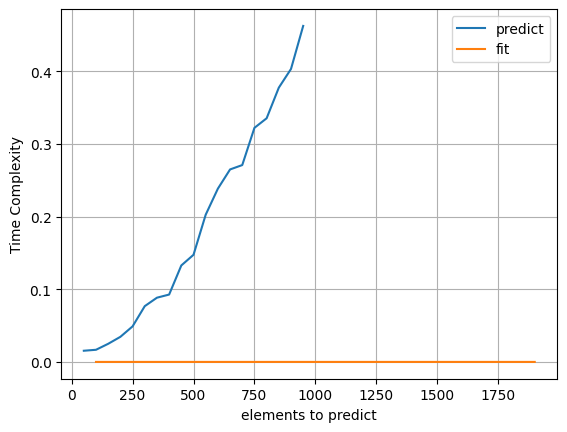

In [ ]:
plt.xlabel('elements to predict')
plt.ylabel('Time Complexity')
plt.plot(elements2, times2, label ='predict')
plt.plot(elements, times,label='fit')
plt.grid()
plt.legend()
plt.show()

from above graph we can see that to fit it always takes O(1) time and to predict it takes  quadratic time so it's complexity is O(n*m)  = O(n^2)

for the upper one we put dimension of training and testing data constant let's see what happens  if we increase it as well


The shape of the test set has a significant impact on the time taken to predict because the K-nearest neighbors algorithm calculates the distance between each row of points in the test set and every row of points in the training data.

In simpler terms, let's consider an example where we have one row of data in the test set and ten rows of data in the training set. For each data point in the test set, we iterate through all ten rows in the training set to calculate the distance. We then obtain the labels from the k closest points and determine the most common label.

Therefore, when the size of the test set increases, the number of distance calculations grows proportionally. As a result, the prediction time increases. Additionally, the dimensionality of the data also affects the prediction time. With higher dimensions, the distance calculations become more complex, leading to increased computational time

<ipython-input-85-454f62f50b06>:44: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  result = mode(labels).mode[0]


Train shape: (100, 1), Fit time: 0.0000, Test shape: (50, 1), Predict time: 0.0167
Train shape: (200, 2), Fit time: 0.0000, Test shape: (100, 2), Predict time: 0.0219
Train shape: (300, 3), Fit time: 0.0000, Test shape: (150, 3), Predict time: 0.0326
Train shape: (400, 4), Fit time: 0.0000, Test shape: (200, 4), Predict time: 0.0501
Train shape: (500, 5), Fit time: 0.0000, Test shape: (250, 5), Predict time: 0.0832
Train shape: (600, 6), Fit time: 0.0000, Test shape: (300, 6), Predict time: 0.1025
Train shape: (700, 7), Fit time: 0.0000, Test shape: (350, 7), Predict time: 0.1233
Train shape: (800, 8), Fit time: 0.0000, Test shape: (400, 8), Predict time: 0.1186
Train shape: (900, 9), Fit time: 0.0000, Test shape: (450, 9), Predict time: 0.1311
Train shape: (1000, 10), Fit time: 0.0000, Test shape: (500, 10), Predict time: 0.1747
Train shape: (1100, 11), Fit time: 0.0000, Test shape: (550, 11), Predict time: 0.1898
Train shape: (1200, 12), Fit time: 0.0000, Test shape: (600, 12), Predi

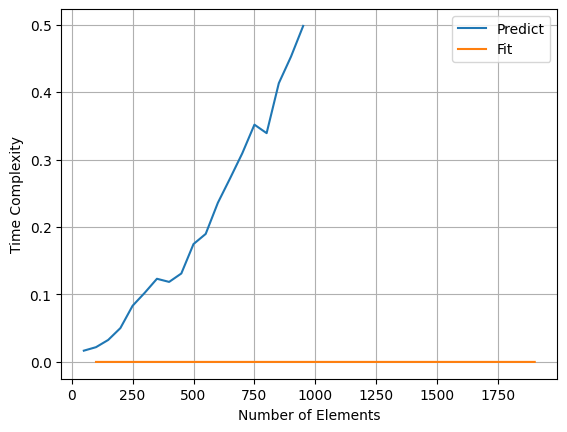

In [ ]:
from numpy.random import randint
import time
import numpy as np
import matplotlib.pyplot as plt

elements = []
elements3 = []
times = []
times3 = []

for i in range(1, 20):
    train = randint(0, 100 * i, size=(100 * i, i))
    label = randint(0, 100 * i, 100 * i)
    test = randint(0, 50 * i, size=(50 * i, i))
    cc = OurKNearestNeighbors(14)

    start_fit = time.time()
    cc.fit(train, label)
    end_fit = time.time()

    start_predict = time.time()
    cc.predict(test)
    end_predict = time.time()

    train_shape = np.shape(train)
    test_shape = np.shape(test)
    fit_time = end_fit - start_fit
    predict_time = end_predict - start_predict

    print(f"Train shape: {train_shape}, Fit time: {fit_time:.4f}, Test shape: {test_shape}, Predict time: {predict_time:.4f}")

    elements.append(train_shape)
    elements3.append(test_shape)
    times.append(fit_time)
    times3.append(predict_time)

# now since there are dimension of data let's multiply them to get understandable result
elements = [shape[0] for shape in elements]
elements3 = [shape[0] for shape in elements3]

# Plotting the results
plt.xlabel('Number of Elements')
plt.ylabel('Time Complexity')
plt.plot(elements3, times3, label='Predict')
plt.plot(elements, times, label='Fit')
plt.grid()
plt.legend()
plt.show()


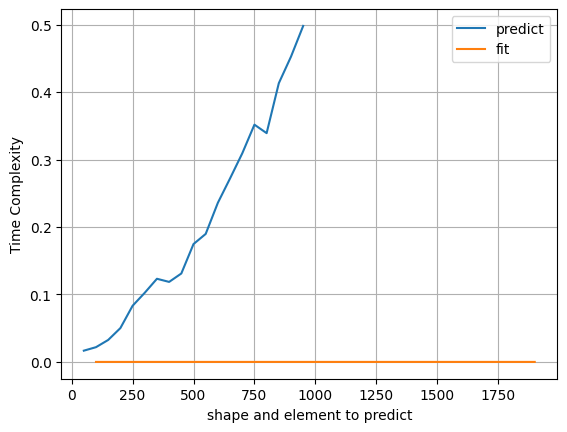

In [ ]:
plt.xlabel('shape and element to predict')
plt.ylabel('Time Complexity')
plt.plot(elements3, times3, label ='predict')
plt.plot(elements, times,label='fit')
plt.grid()
plt.legend()
plt.show()

#now let's compare the plot

In [ ]:
elements2

array([ 50., 100., 150., 200., 250., 300., 350., 400., 450., 500., 550.,
       600., 650., 700., 750., 800., 850., 900., 950.])

In [ ]:
times2

array([0.01539779, 0.01671934, 0.02495718, 0.03455257, 0.04891872,
       0.07677174, 0.08840919, 0.09272289, 0.13278937, 0.14745474,
       0.20260048, 0.23849487, 0.26494074, 0.27096486, 0.32219648,
       0.33537054, 0.37750721, 0.40325046, 0.462497  ])

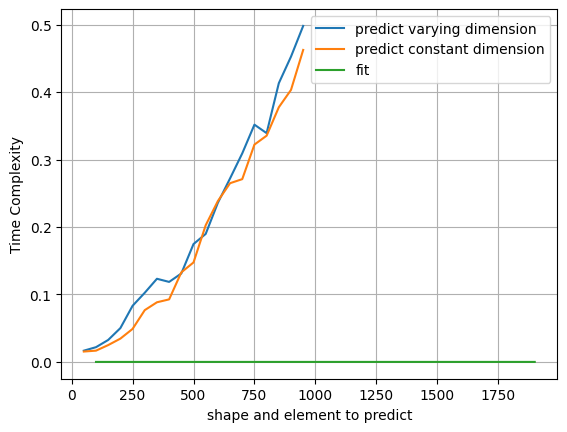

In [ ]:
plt.xlabel('shape and element to predict')
plt.ylabel('Time Complexity')
plt.plot(elements3, times3, label ='predict varying dimension')
plt.plot(elements2, times2, label ='predict constant dimension')

plt.plot(elements, times,label='fit')
plt.grid()
plt.legend()
plt.show()

#from this plot we can see that dimenstion also has clear impact on the KNN algorithm performance
hence the complexity of KNN model is d*M*n where d= dimension, M - training data and n = test data